# Présentation du jeu de données

### Attendu du livrable

Il s'agit de votre présentation intégrant votre notebook Jupyter (qui sera envoyé la veille de la soutenance) et votre présentation de 20 minutes qui devra montrer l'ensemble de votre démarche :
* La génération de votre/vos jeux de données en justifiant les choix et les traitements effectués pour faire face aux problématiques classiques de ce type de travail.
* le choix de (des) l'algorithme(s) d'"IA" retenu(s).
* l'analyse des résultats obtenus et leur interprétation en s'appuyant sur des métriques.
* La démarche mise en œuvre pour améliorer un modèle.
* le choix du modèle retenu au final parmi les différents essais effectués en justifiant pas rapport au besoin de votre client et des métriques.
* vos propositions finales justifiées

Pour ce projet, nous allons utiliser un jeu de données modifié (cf. [Éthique des données](ethique_des_donnees.ipynb)) en fonction de la problématique éthique de l'utilisation des données et de l'IA. Il vérifie les différentes réglementations en vigueur (RGPD, CNIL, etc.) et respec les principes de l'éthique.

Pour définir si ce jeu de données est suffisant même emputé de ses données non éthiques, nous allons faire le même traitement que pour le jeu de données original.

|Pas utile|Pas éthique|
|:-|:-|
|"Over18"|Supprimer les personne de moins de 18 ans (cf. RGPD)|
|"EducationField"|"Gender" => peut porter à la discrimination|
|"EmployeeCount" = 0|"MaritalStatus" => peut porter à la discrimination|
|~"StockOptionLevel"||

## Visualisation des données

In [151]:
import pandas as pd
import numpy as np
import os

GENERAL_DATA_PATH = "./data/general_data.csv"
EMPLOYEE_SURVEY_DATA_PATH = "./data/employee_survey_data.csv"
MANAGER_SURVEY_DATA_PATH = "./data/manager_survey_data.csv"
IN_TIME_DATA_PATH = "./data/in_out_time/in_time.csv"
OUT_TIME_DATA_PATH = "./data/in_out_time/out_time.csv"

def load_data(data_path):
    csv_path = os.path.join(data_path)
    return pd.read_csv(csv_path, sep=',')

In [152]:
df_general = load_data(GENERAL_DATA_PATH)
df_general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [153]:
df_employee_survey = load_data(EMPLOYEE_SURVEY_DATA_PATH)
df_employee_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [154]:
df_manager_survey = load_data(MANAGER_SURVEY_DATA_PATH)
df_manager_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


In [155]:
df_in_time = load_data(IN_TIME_DATA_PATH)
df_in_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


In [156]:
df_out_time = load_data(OUT_TIME_DATA_PATH)
df_out_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


## Agrégation des données

In [157]:
def agregate_dataframes(list_df, on_column, how):
    df_master = list_df[0]
    for df in list_df[1:]:
        df_master = df_master.merge(df,
                       on = on_column, 
                       how = how)
    return df_master

In [158]:
df_total = agregate_dataframes([df_general, df_employee_survey, df_manager_survey], "EmployeeID", "outer")
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

### Création du jeu de test

In [159]:
from sklearn.model_selection import StratifiedShuffleSplit

def split_train_test(data, test_ratio):
    split = StratifiedShuffleSplit(n_splits=1, test_size=test_ratio, random_state=42)
    for train_index, test_index in split.split(data, data["Attrition"]):
        strat_train_set = data.loc[train_index]
        strat_test_set = data.loc[test_index]
    return strat_train_set, strat_test_set

In [160]:
train_set, test_set = split_train_test(df_total, 0.2)
print(len(train_set), "train +", len(test_set), "test")

3528 train + 882 test


In [161]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3528 entries, 3465 to 1125
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      3528 non-null   int64  
 1   Attrition                3528 non-null   object 
 2   BusinessTravel           3528 non-null   object 
 3   Department               3528 non-null   object 
 4   DistanceFromHome         3528 non-null   int64  
 5   Education                3528 non-null   int64  
 6   EducationField           3528 non-null   object 
 7   EmployeeCount            3528 non-null   int64  
 8   EmployeeID               3528 non-null   int64  
 9   Gender                   3528 non-null   object 
 10  JobLevel                 3528 non-null   int64  
 11  JobRole                  3528 non-null   object 
 12  MaritalStatus            3528 non-null   object 
 13  MonthlyIncome            3528 non-null   int64  
 14  NumCompaniesWorked   

### Dendrogramme

In [162]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X = train_set.copy() # A new copy of data set
# Removing non-numerical columns
X = X.select_dtypes(include=[np.number])
# Replacing NaN values with median
X.fillna(X.median(), inplace=True)
X.head()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
3465,41,1,4,1,3466,1,52570,1.0,14,8,...,10.0,2,10,0,8,2.0,3.0,3.0,4,3
3485,34,1,1,1,3486,2,26960,3.0,23,8,...,6.0,3,0,0,0,3.0,4.0,3.0,3,4
3052,21,10,2,1,3053,1,53730,1.0,12,8,...,1.0,2,1,0,0,3.0,2.0,3.0,3,3
2012,28,7,3,1,2013,2,29760,1.0,14,8,...,1.0,3,1,0,0,1.0,2.0,3.0,3,3
426,40,1,4,1,427,2,192320,2.0,14,8,...,11.0,3,1,0,0,1.0,2.0,2.0,3,3


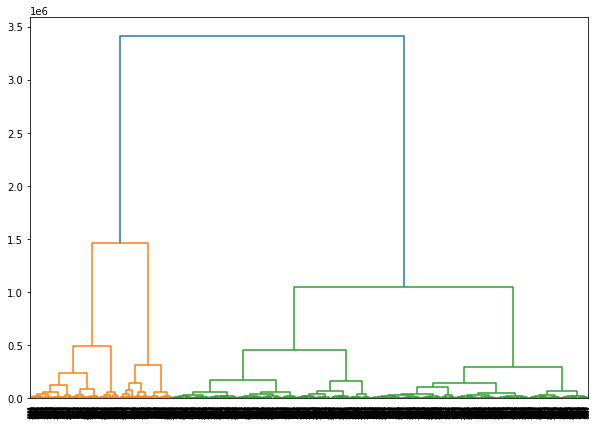

In [163]:
plt.figure(figsize=(10, 7))
dendrogram(linkage(X, method='ward'), orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EmployeeCount'}>,
        <AxesSubplot:title={'center':'EmployeeID'}>],
       [<AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
        <AxesSubplot:title={'center':'StandardHours'}>],
       [<AxesSubplot:title={'center':'StockOptionLevel'}>,
        <AxesSubplot:title={'center':'TotalWorkingYears'}>,
        <AxesSubplot:title={'center':'TrainingTimesLastYear'}>,
        <AxesSubplot:title={'center':'YearsAtCompany'}>,
        <AxesSubplot:title={'center':'YearsSinceLastPromotion'}>],
       [<AxesSubplot:title={'center':'YearsWithCurrManager'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <Axe

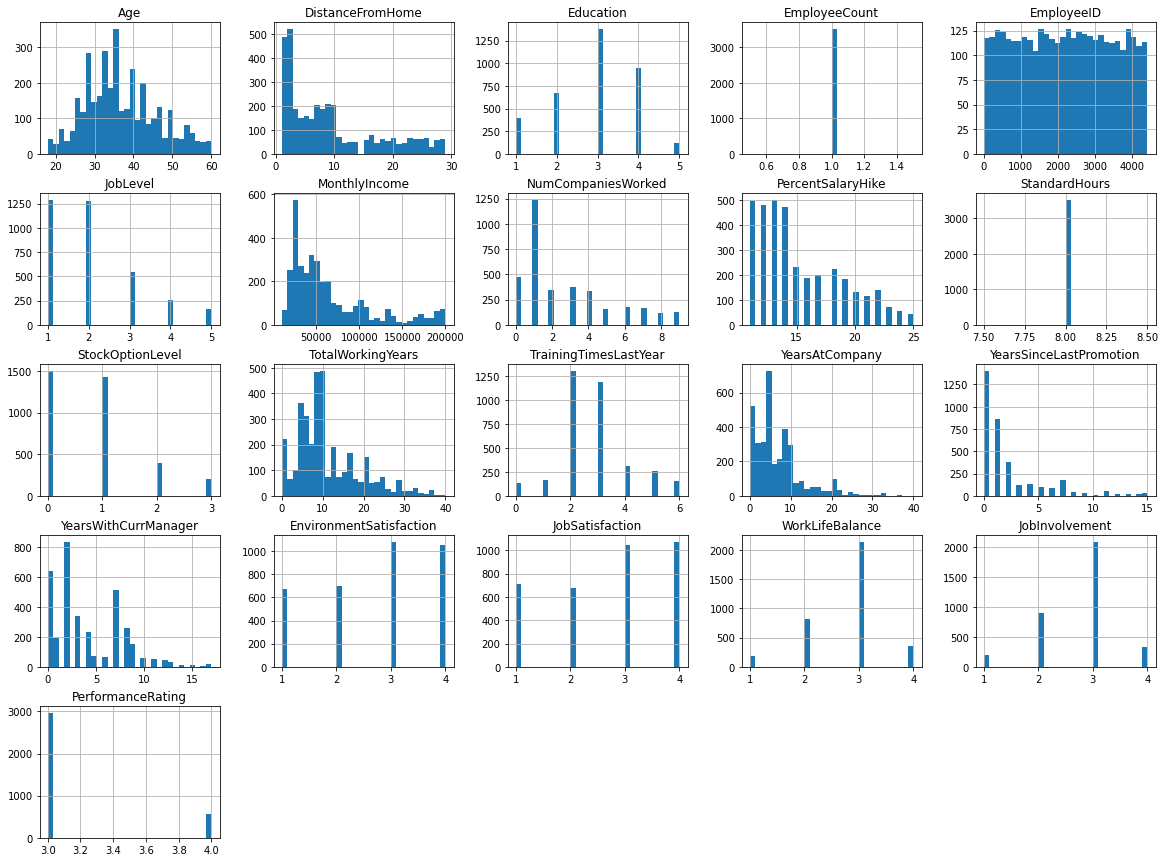

In [164]:
train_set.hist(bins=30, figsize=(20, 15))

## Chercher les corrélations

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='DistanceFromHome', ylabel='Age'>,
        <AxesSubplot:xlabel='MonthlyIncome', ylabel='Age'>,
        <AxesSubplot:xlabel='TotalWorkingYears', ylabel='Age'>,
        <AxesSubplot:xlabel='YearsAtCompany', ylabel='Age'>,
        <AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='Age'>,
        <AxesSubplot:xlabel='YearsWithCurrManager', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='DistanceFromHome'>,
        <AxesSubplot:xlabel='DistanceFromHome', ylabel='DistanceFromHome'>,
        <AxesSubplot:xlabel='MonthlyIncome', ylabel='DistanceFromHome'>,
        <AxesSubplot:xlabel='TotalWorkingYears', ylabel='DistanceFromHome'>,
        <AxesSubplot:xlabel='YearsAtCompany', ylabel='DistanceFromHome'>,
        <AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='DistanceFromHome'>,
        <AxesSubplot:xlabel='YearsWithCurrManager', ylabel='DistanceFromHome'>],
       [<AxesSubplot:xlabel='Age', yl

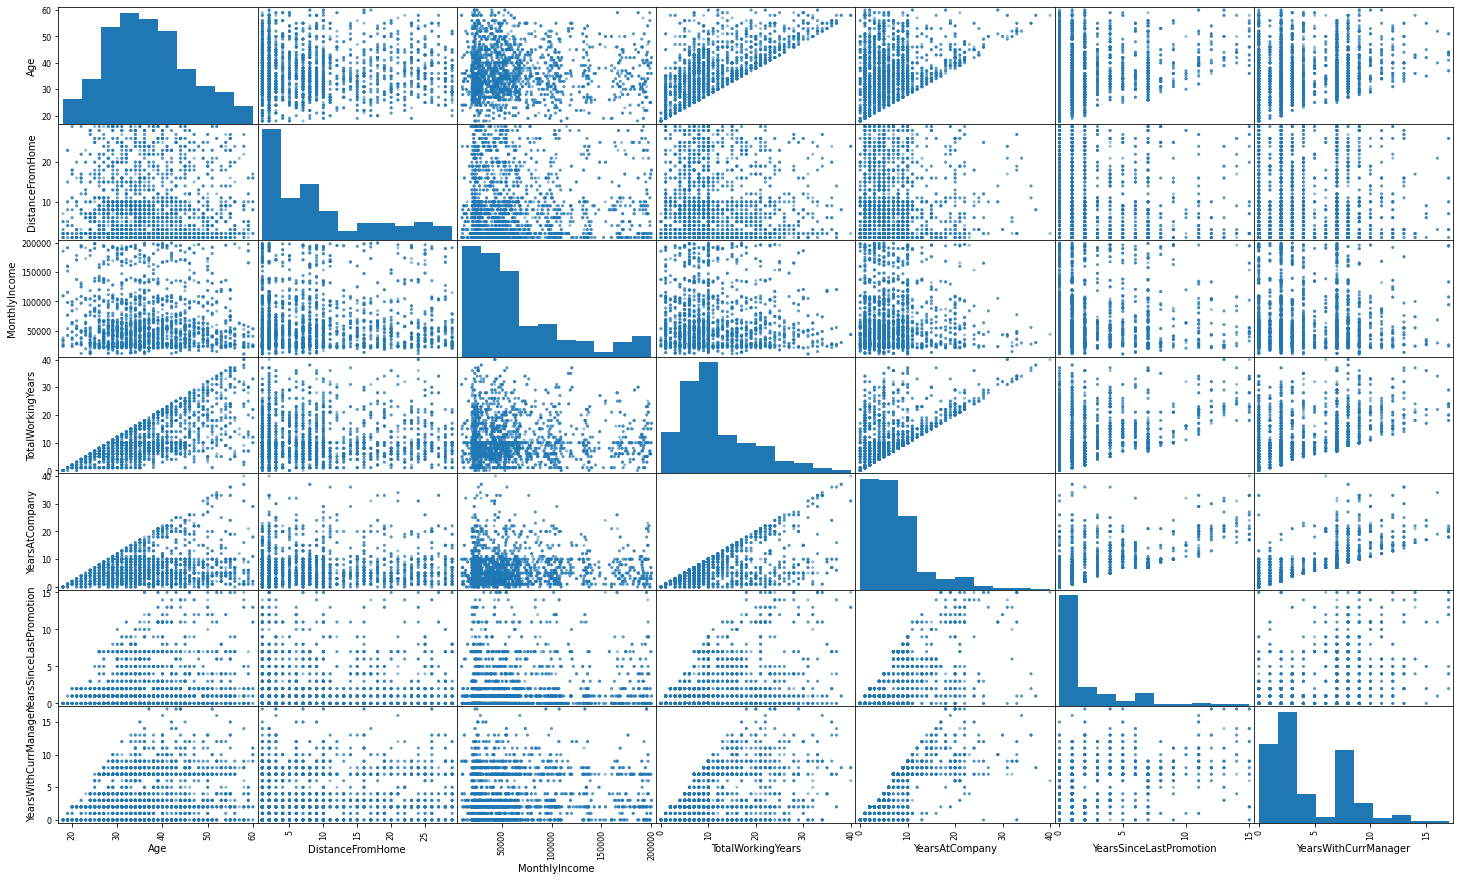

In [165]:
from pandas.plotting import scatter_matrix

attributes = ["Age", "DistanceFromHome", "MonthlyIncome", "TotalWorkingYears", "YearsAtCompany", "YearsSinceLastPromotion", "YearsWithCurrManager"]
scatter_matrix(train_set[attributes], figsize=(25, 15))

Sur l'ensemble des graphiques ci-dessus, on peut voir une corrélation entre les variables suivantes :
* MonthlyWorkingYears et Age
* YearsAtCompany et Age
* YearsSinceLastPromotion et Age
* YearsWithCurrManager et Age
* TotalWorkingYears et YearsAtCompany
* TotalWorkingYears et YearSinceLastPromotion
* TotalWorkingYears et YearsWithCurrManager
* YearsAtCompany et YearsSinceLastPromotion
* YearsAtCompany et YearsWithCurrManager

On va vérifier avec le coefficient de corrélation de Pearson.

In [166]:
# Pearson correlation
corr_matrix = train_set.corr()
corr_matrix["Age"].sort_values(ascending=False)

Age                        1.000000
TotalWorkingYears          0.687479
YearsAtCompany             0.303995
NumCompaniesWorked         0.302573
YearsSinceLastPromotion    0.209991
YearsWithCurrManager       0.192375
JobInvolvement             0.024963
DistanceFromHome           0.020284
EmployeeID                 0.016220
EnvironmentSatisfaction    0.015431
JobSatisfaction            0.003159
JobLevel                  -0.001795
WorkLifeBalance           -0.011611
PerformanceRating         -0.021689
PercentSalaryHike         -0.031440
Education                 -0.040497
StockOptionLevel          -0.040933
MonthlyIncome             -0.041327
TrainingTimesLastYear     -0.045376
EmployeeCount                   NaN
StandardHours                   NaN
Name: Age, dtype: float64

In [167]:
# Pearson correlation
corr_matrix = train_set.corr()
corr_matrix["TotalWorkingYears"].sort_values(ascending=False)

TotalWorkingYears          1.000000
Age                        0.687479
YearsAtCompany             0.616246
YearsWithCurrManager       0.448549
YearsSinceLastPromotion    0.393249
NumCompaniesWorked         0.242085
EmployeeID                 0.011697
WorkLifeBalance            0.009421
DistanceFromHome           0.007330
JobInvolvement             0.005107
EnvironmentSatisfaction    0.005013
PerformanceRating          0.000947
StockOptionLevel          -0.002687
Education                 -0.005053
JobSatisfaction           -0.012441
PercentSalaryHike         -0.019499
MonthlyIncome             -0.027237
JobLevel                  -0.032583
TrainingTimesLastYear     -0.048444
EmployeeCount                   NaN
StandardHours                   NaN
Name: TotalWorkingYears, dtype: float64

On va donc créer des variables qui vont contenir la corrélation entre les variables :
* AgePerWorkingYears (Age / TotalWorkingYears)
* AgePerYarsAtCompany (Age / YearsAtCompany)
* AgePerNumCompaniesWorked (Age / NumCompaniesWorked)
* *AgePerYearsSinceLastPromotion (Age / YearsSinceLastPromotion)*
* *AgePerYearsWithCurrManager (Age / YearsWithCurrManager)*
* TotalWorkingYearsPerYearsAtCompany (TotalWorkingYears / YearsAtCompany)
* TotalWorkingYearsPerYearsWithCurrManager (TotalWorkingYears / YearsWithCurrManager)
* TotalWorkingYearsPerYearsSinceLastPromotion (TotalWorkingYears / YearsSinceLastPromotion)

## Préparation à la normalisation

### Intégration des données

Les données sont intégrées dans le jeu de données sur le champ **EmployeeID** depuis plusieurs fichier csv : ``employee_survey_data.csv``, ``manager_survey_data.csv``, ``general_data.csv``. 

Les données des fichiers ``in_time.csv`` et ``out_time.csv`` sont traitées pour obtenir la moyenne de temps de travail par jour pour chaque employé nommé AvgWorkingHours.

#### Extraire les données de time

In [168]:
def avg_time(df):
    '''
    Calculate the average time of in_time and out_time.

    Parameters
    ----------
    df : pandas.DataFrame
        Dataframe with in_time or out_time.
    
    Returns
    -------
    df : pandas.DataFrame
        Dataframe with EmployeeID and AvgTime.
    '''
    # Set first column as index
    df = df.copy().set_index(df.columns[0])
    # Remove first column
    df = df.copy().transpose()

    # Convertir les valeurs datetime en valeurs time
    df = df.apply(pd.to_datetime)
    df = df.apply(lambda x: x - x.dt.normalize())
    df = df.mean(skipna=True)
    # Add column EmployeeID
    df = df.to_frame().reset_index()
    df.columns = ["EmployeeID", "AvgTime"]
    return df

In [169]:
# Calculer la moyenne d'heure d'arrivée par ligne
avgInTimePerEmployee = avg_time(df_in_time)

avgInTimePerEmployee

,EmployeeID,AvgTime
0,1,0 days 10:00:05.120689655
1,2,0 days 09:59:17.063559322
2,3,0 days 10:01:30.219008264
3,4,0 days 09:58:54.587234042
4,5,0 days 09:59:54.575510204
...,...,...
4405,4406,0 days 10:01:11.242798353
4406,4407,0 days 10:00:15.294605809
4407,4408,0 days 09:58:47.904761904
4408,4409,0 days 10:01:06.767634854


In [170]:
# Calculer la moyenne d'heure de départ par ligne
avgOutTimePerEmployee = avg_time(df_out_time)

avgOutTimePerEmployee

,EmployeeID,AvgTime
0,1,0 days 17:22:30.262931034
1,2,0 days 17:42:25.351694915
2,3,0 days 17:02:17.884297520
3,4,0 days 17:10:31.829787234
4,5,0 days 18:00:16.804081632
...,...,...
4405,4406,0 days 18:32:31.440329218
4406,4407,0 days 16:05:49.929460580
4407,4408,0 days 17:41:11.779220779
4408,4409,0 days 19:30:40.107883817


In [171]:
# Substract avgInTimePerEmployee from avgOutTimePerEmployee
avgWorkTimePerEmployee = avgOutTimePerEmployee.copy()
avgWorkTimePerEmployee["AvgTime"] = avgOutTimePerEmployee["AvgTime"] - avgInTimePerEmployee["AvgTime"]
avgWorkTimePerEmployee

,EmployeeID,AvgTime
0,1,0 days 07:22:25.142241379
1,2,0 days 07:43:08.288135593
2,3,0 days 07:00:47.665289256
3,4,0 days 07:11:37.242553192
4,5,0 days 08:00:22.228571428
...,...,...
4405,4406,0 days 08:31:20.197530865
4406,4407,0 days 06:05:34.634854771
4407,4408,0 days 07:42:23.874458875
4408,4409,0 days 09:29:33.340248963


### Nettoyer les données

Dans les données fournis, Il y a des données manquantes sur : 
* NumCompaniesWorked
* TotalWorkingYears
* EnvironmentSatisfaction
* JobSatisfaction
* WorkLifeBalance

Il en manque aussi certaines valeurs dans les fichiers ``in_time.csv`` et ``out_time.csv``. On ignore ces données car elles ne sont pas utilisées dans le modèle puisque nous avons calculé la moyenne de temps de travail par jour pour chaque employé.

Nous allons remplacer les données manquantes par la médiane de la colonne. ce choix est motivé par le faible manque de données et le fait que la médiane est moins sensible aux valeurs aberrantes que la moyenne.

De plus, les doublons sont également supprimés.

### Normalisation des données

Il s'agit de la partie de mise à l'échelle des données de sorte que chaque variable ai une plage de valeur comparable. 
Dans notre cas, la méthode de normalisation de la moyenne et de l'écart type (normalisation z-score), est la plus appropriée. Nos données ont une distribution normale ou presque normale et cette méthode transforme les données pour qu'elles aient une moyenne $\overline{x}=0$ et un écart type $\sigma = 1$, ce qui va faciliter la comparaison entre les différentes variables.

### Réduction de la dimensionnalité

Pour la réduction de dimensionalité, nous utilisons la technique de l'ACP (Analyse en Composantes Principales). Cette technique permet de réduire le nombre de variables en utilisant les variables les plus corrélées entre elles. 

> *Demande ahmed si ACP si nos dimensions que nous ajoutons sont pertinantes?*

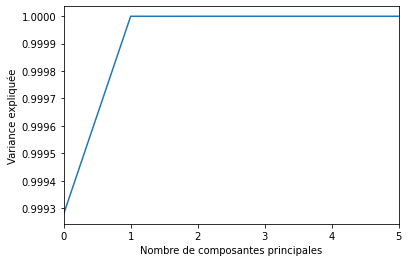

In [172]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Instanciation de la classe PCA
pca = PCA()

num_train_set = X.select_dtypes(include=[np.number])

# Calcul des composantes principales
pca.fit(num_train_set)

# Création du graphique de variance expliquée
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée')
# Changer les borne de l'axe des x
plt.xlim(0, 5, 1)
plt.show()

### Identification des valeurs aberrantes

Dans le cas de la standardisation, les valeurs aberrantes sont mises à l'échelle 

> *critère de z-score, algo isolation forest pour les valeurs aberrantes?*